<a href="https://colab.research.google.com/github/o7s8r6/CVIIIVAN/blob/main/val_train_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

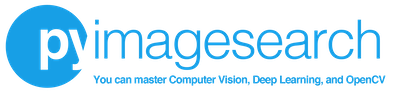

# Why is my validation loss lower than my training loss?
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Why is my validation loss lower than my training loss?](https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/) blog post published on 2019-10-14.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/val-train-loss/val-train-loss.zip
!unzip -qq val-train-loss.zip
%cd val-train-loss

--2020-11-16 03:24:31--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/val-loss-lower-train-loss/val-train-loss.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.201.144
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.201.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996 (4.9K) [application/zip]
Saving to: ‘val-train-loss.zip’

val-train-loss.zip  100%[===================>]   4.88K  --.-KB/s    in 0s      

2020-11-16 03:24:31 (160 MB/s) - ‘val-train-loss.zip’ saved [4996/4996]

/content/val-train-loss


## Blog Post Code

### Import Packages

In [ ]:
# import the necessary packages
from pyimagesearch.minivggnet import MiniVGGNet
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Reason #2: Training loss is measured during each epoch while validation loss is measured after each epoch

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--history", required=True,
# 	help="path to output training history file")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "history": "training.pickle",
}

In [ ]:
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32

In [ ]:
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# we are using "channels last" ordering, so the design matrix shape
# should be: num_samples x rows x columns x depth
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# one-hot encode the training and testing labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

[INFO] loading Fashion MNIST...
4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	 batch_size=BS, epochs=NUM_EPOCHS)

[INFO] compiling model...
[INFO] training model...
Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5492 - accuracy: 0.8169 - val_loss: 0.3092 - val_accuracy: 0.8880
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3390 - accuracy: 0.8783 - val_loss: 0.2745 - val_accuracy: 0.9000
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.8948 - val_loss: 0.2445 - val_accuracy: 0.9137
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2685 - accuracy: 0.9038 - val_loss: 0.2443 - val_accuracy: 0.9126
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2528 - accuracy: 0.9096 - val_loss: 0.2316 - val_accuracy: 0.9148
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2409 - accuracy: 0.9116 - val_loss: 0.2248 - val_accuracy: 0.9203
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2340 - 

In [ ]:
# make predictions on the test set and show a nicely formatted
# classification report
preds = model.predict(testX)
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

# serialize the training history to disk
print("[INFO] serializing training history...")
f = open(args["history"], "wb")
f.write(pickle.dumps(H.history))
f.close()

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.87      0.90      0.89      1000
     trouser       1.00      0.99      0.99      1000
    pullover       0.89      0.92      0.90      1000
       dress       0.93      0.94      0.93      1000
        coat       0.88      0.91      0.89      1000
      sandal       0.99      0.99      0.99      1000
       shirt       0.83      0.74      0.78      1000
     sneaker       0.96      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

[INFO] serializing training history...


### Shifting our training loss values

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--input", required=True,
# 	help="path to input training history file")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "input": "training.pickle",
}

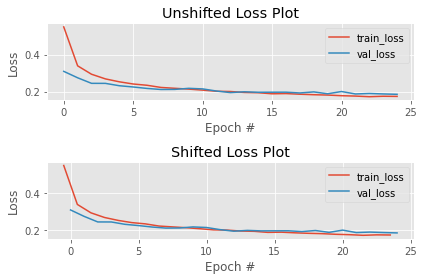

In [ ]:
# load the training history
H = pickle.loads(open(args["input"], "rb").read())

# determine the total number of epochs used for training, then
# initialize the figure
epochs = np.arange(0, len(H["loss"]))
plt.style.use("ggplot")
(fig, axs) = plt.subplots(2, 1)

# plot the *unshifted* training and validation loss
axs[0].plot(epochs, H["loss"], label="train_loss")
axs[0].plot(epochs, H["val_loss"], label="val_loss")
axs[0].set_title("Unshifted Loss Plot")
axs[0].set_xlabel("Epoch #")
axs[0].set_ylabel("Loss")
axs[0].legend()

# plot the *shifted* training and validation loss
axs[1].plot(epochs - 0.5, H["loss"], label="train_loss")
axs[1].plot(epochs, H["val_loss"], label="val_loss")
axs[1].set_title("Shifted Loss Plot")
axs[1].set_xlabel("Epoch #")
axs[1].set_ylabel("Loss")
axs[1].legend()

# show the plots
plt.tight_layout()
plt.show()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Why is my validation loss lower than my training loss?*](https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/) blog post published on 2019-10-14.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```